In [1]:
import numpy as np
import pymc3 as pm
from simulate import *
import matplotlib.pyplot as plt
import seaborn as sns


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [16]:
N = 100
num_gens = 49
dt = 0.1
f0_vals = np.random.random(N)
s_vals = np.random.random(N) / 10

times = np.array([7, 14, 28, 42, 49])

traj = create_trajectories(f0_vals, s_vals, times)

In [37]:
fitness_model = pm.Model()

time = times.reshape([-1, 5])

with fitness_model:
    s = pm.Flat("s", shape = (N, 1))
    f0 = pm.HalfFlat("f0", shape = (N, 1))
    f = f0 * pm.math.exp(s * time) / pm.math.sum(f0 * pm.math.exp(s * time),  axis = 0)
    
    f_obs = pm.Poisson("f_obs", mu = 100 * 1000 * f, observed = 100 * 1000 * traj)


In [38]:
map_estimate = pm.find_MAP(model=fitness_model)


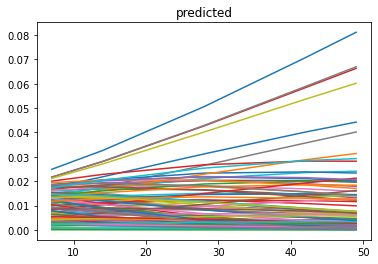

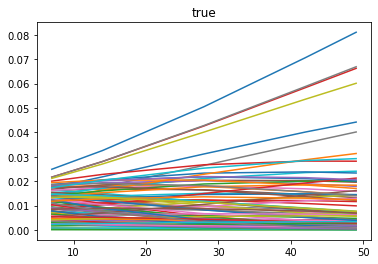

In [39]:
f_pred = map_estimate["f0"] * np.exp(map_estimate["s"] * times)
f_pred /= np.sum(f_pred, axis = 0)

plt.figure()
plt.plot(times, f_pred.T)
plt.title("predicted")

plt.figure()
plt.plot(times, traj.T)
plt.title("true")
plt.show()

In [40]:
print(np.round(map_estimate["s"][:, 0] - map_estimate["s"][0, 0], 3))
print(np.round(s_vals - s_vals[0], 3))

[ 0.    -0.027 -0.02  -0.078 -0.027 -0.027 -0.088 -0.029 -0.053 -0.019
 -0.062 -0.022 -0.03  -0.027 -0.064 -0.011 -0.037  0.003 -0.007 -0.044
 -0.079 -0.056 -0.087 -0.019 -0.077 -0.019 -0.023 -0.032 -0.046 -0.01
 -0.017 -0.09  -0.059  0.004 -0.023 -0.042 -0.082 -0.078 -0.001 -0.067
 -0.017 -0.002 -0.014 -0.014 -0.091 -0.031 -0.003  0.005 -0.036 -0.048
 -0.021 -0.025 -0.028 -0.073 -0.068 -0.051 -0.024 -0.051 -0.09  -0.09
  0.006 -0.015 -0.078  0.    -0.02  -0.088 -0.083 -0.076 -0.058 -0.038
 -0.052 -0.085 -0.066 -0.076 -0.042 -0.036 -0.02  -0.067  0.003 -0.045
 -0.086 -0.037 -0.086 -0.078 -0.059  0.004 -0.058 -0.029 -0.015 -0.01
 -0.08  -0.021 -0.011 -0.038 -0.066 -0.027 -0.043 -0.085 -0.036 -0.013]
[ 0.    -0.027 -0.02  -0.078 -0.027 -0.027 -0.087 -0.029 -0.053 -0.019
 -0.062 -0.022 -0.03  -0.027 -0.064 -0.011 -0.037  0.003 -0.007 -0.044
 -0.079 -0.055 -0.081 -0.019 -0.077 -0.019 -0.023 -0.032 -0.046 -0.01
 -0.017 -0.09  -0.058  0.004 -0.023 -0.042 -0.081 -0.077 -0.001 -0.067
 -0.017 -

In [41]:
# with fitness_model:
#     trace=pm.sample(5000, return_inferencedata=True)